In [8]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.3/150.0 MB 5.0 MB/s eta 0:00:30
   ---------------------------------------- 0.9/150.0 MB 7.9 MB/s eta 0:00:19
   ---------------------------------------- 1.4/150.0 MB 9.1 MB/s eta 0:00:17
    --------------------------------------- 2.0/150.0 MB 9.8 MB/s eta 0:00:16
    --------------------------------------- 2.5/150.0 MB 10.1 MB/s eta 0:00:15
    --------------------------------------- 3.1/150.0 MB 10.4 MB/s eta 0:00:15
    --------------------------------------- 3.6/150.0 MB 10.5 MB/s eta 0:00:14
   - -------------------------------------- 4.0/150.0 MB 10.2 MB/s eta 0:00:15
   - -------------

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
df=pd.read_csv(r"customer_clv_data.csv")

In [25]:
df.head()

,Customer ID,Total Purchases ($),Engagement Score,Predicted CLV ($)
0,CUST001,960,7.57,9708
1,CUST002,3872,6.74,16871
2,CUST003,3192,8.98,12335
3,CUST004,566,5.25,13668
4,CUST005,4526,2.08,2549


In [26]:
# Split the dataset into features (X) and target (y)
X = df[['Total Purchases ($)', 'Engagement Score']]
y = df['Predicted CLV ($)']

In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from xgboost import XGBRegressor
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}


Linear Regression - MAE: 5172.2863972603545
Linear Regression - RMSE: 5790.3234595121285


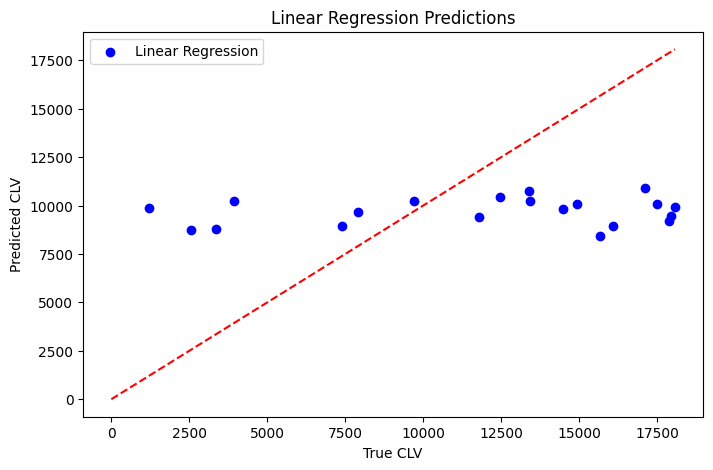

In [33]:
# ========================================
# 1. Linear Regression Model
# ========================================
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print("Linear Regression - MAE:", mae_lr)
print("Linear Regression - RMSE:", rmse_lr)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('True CLV')
plt.ylabel('Predicted CLV')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()


Random Forest - MAE: 5267.695999999999
Random Forest - RMSE: 6348.658587167056


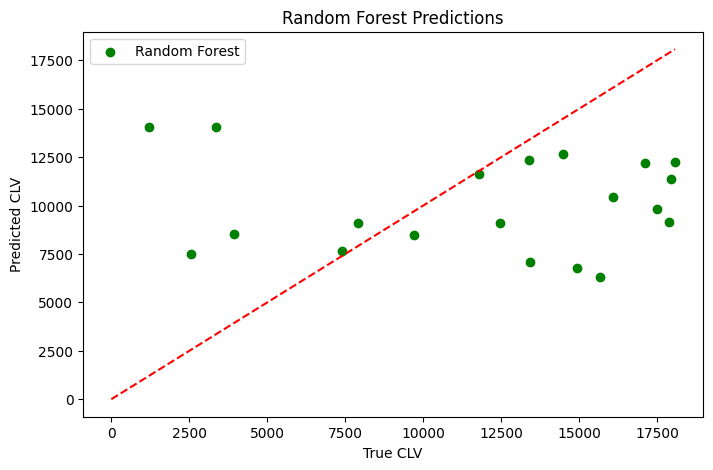

In [34]:
# ========================================
# 2. Random Forest Regressor Model
# ========================================
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest - MAE:", mae_rf)
print("Random Forest - RMSE:", rmse_rf)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('True CLV')
plt.ylabel('Predicted CLV')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

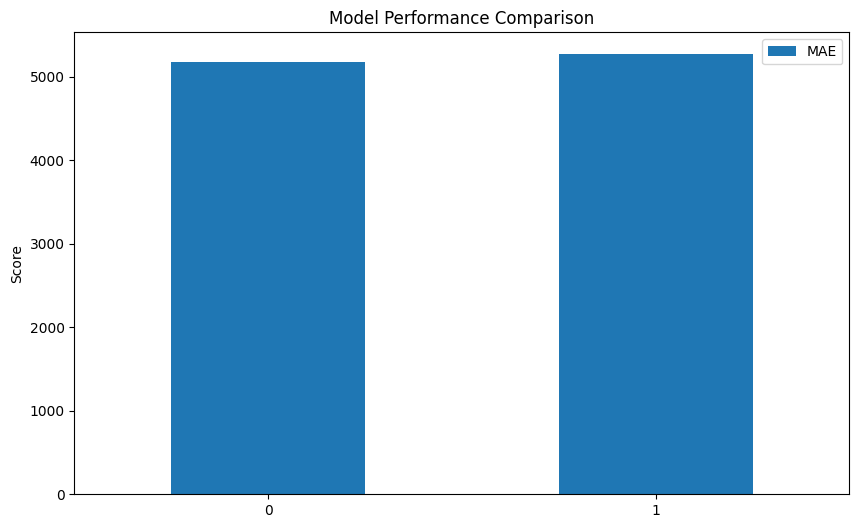

In [36]:
results = {
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [mae_lr, mae_rf]  # Replace with actual MAE values
}

# Create a DataFrame for visualization
results_df = pd.DataFrame(results)

# Plot results
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()


XGBoost - MAE: 5341.59375
XGBoost - RMSE: 6491.5890196468845


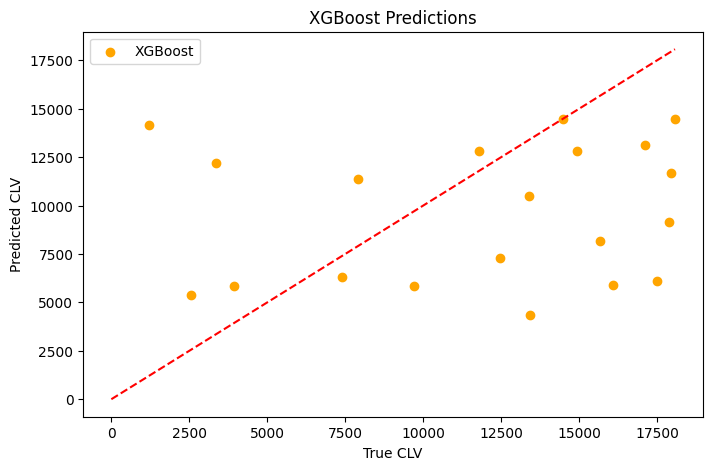

In [37]:
# ========================================
# 3. XGBoost Model
# ========================================
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost - MAE:", mae_xgb)
print("XGBoost - RMSE:", rmse_xgb)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, color='orange', label='XGBoost')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('True CLV')
plt.ylabel('Predicted CLV')
plt.title('XGBoost Predictions')
plt.legend()
plt.show()


In [38]:

# ========================================
# Model Comparison
# ========================================
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb]
})
display(results.sort_values(by='RMSE', ascending=True))

,Model,MAE,RMSE
0,Linear Regression,5172.286397,5790.323460
1,Random Forest,5267.696000,6348.658587
2,XGBoost,5341.593750,6491.589020


In [43]:
# Example: Train a Random Forest model (Use your actual model)
from sklearn.ensemble import RandomForestRegressor
import pickle

# Assume X_train, y_train are defined
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

print("✅ Model training completed!")



✅ Model training completed!


In [44]:
import os
print(os.getcwd())  # This prints the current working directory


C:\Users\CVR\Downloads\Projectt


In [45]:
import pickle
import os

# Define a specific path to save the model
save_path = os.path.join(os.getcwd(), "clv_model.pkl")

# Save the trained model
with open(save_path, "wb") as file:
    pickle.dump(model, file)

print(f"✅ Model saved successfully at: {save_path}")


✅ Model saved successfully at: C:\Users\CVR\Downloads\Projectt\clv_model.pkl
